In [1]:
group_params <- c('mu_go', 'mu_go_var', 'mu_stop', 'mu_stop_var', 'tau_go', 'tau_stop', 'tau_go_var',
                  'tau_stop_var', 'sigma_go', 'sigma_stop', 'sigma_go_var', 'sigma_stop_var', 'p_tf')

dir_lists<- c( paste('/home/dan/documents/lncc/',
                    c('sst_data_train_020/', 'sst_data_train_050/',
                      'sst_data_train_100/', 'sst_data_train_150/',
                      'sst_data_train/'), sep=''))

param_file_names <- c( paste( paste('parameters',c('1','2','3','4'), sep='') , '.csv', sep=''))


In [2]:
stats <- array(NA,c(13,4,5))

ndirs   <- length(dir_lists)
npfiles <- length(param_file_names)

for (dir_num in 1:ndirs) {
    dir <- dir_lists[dir_num]
    
    for (file_num in 1:npfiles) {
        file <- param_file_names[file_num]
        
        data <- read.csv(paste(dir, file, sep=''), sep=';') #, row.names=group_params)
        
        data  <- data[group_params]
        means <- as.vector(colMeans(data))
        
        stats[ , file_num, dir_num] <- means
    }
}

In [3]:
summary <- array(NA, c(5,13))
summary[1,] <- apply(stats[,,1], 1, mean)
summary[2,] <- apply(stats[,,2], 1, mean)
summary[3,] <- apply(stats[,,3], 1, mean)
summary[4,] <- apply(stats[,,4], 1, mean)
summary[5,] <- apply(stats[,,5], 1, mean)

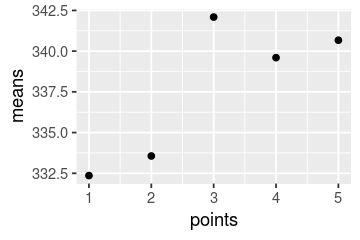

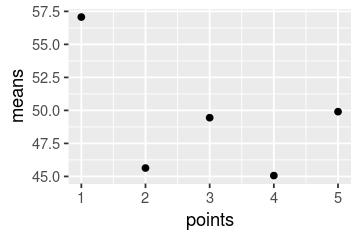

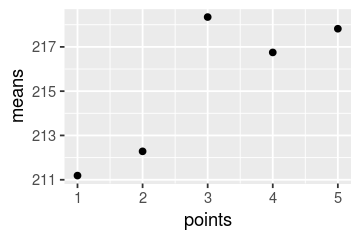

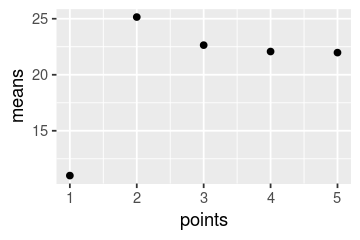

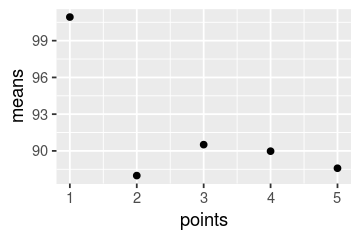

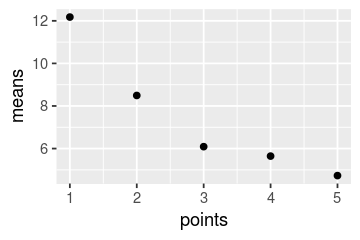

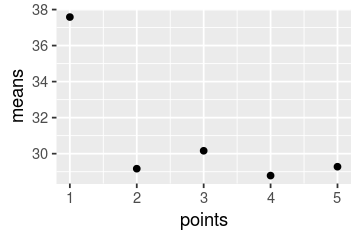

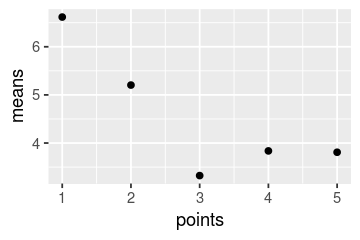

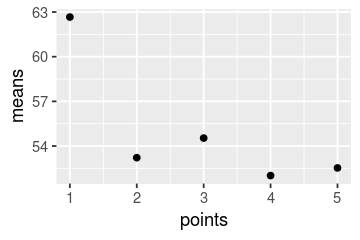

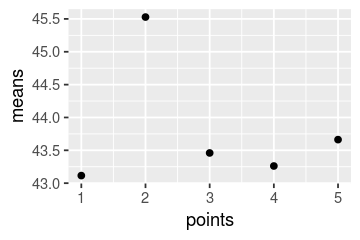

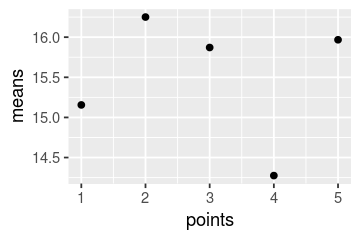

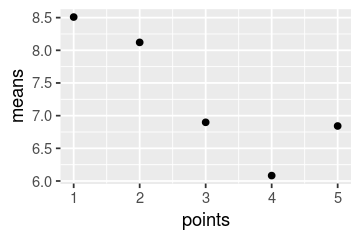

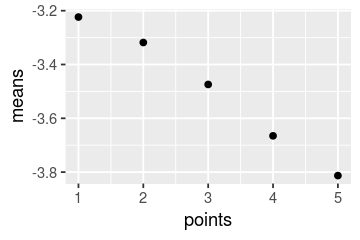

In [69]:
library(ggplot2)
library(reshape2)

## V Coefficients Plot:
nlines = 5
plotchar <- seq(18,18+nlines,1)

xrange <- range(1:5)
yrange <- range(summary)

op <- par(mar=c(10.1, 4.1, 4.1, 2.1))
#plot(xrange, yrange, type="n", xlab="", ylab="", xaxt="n") 

for (i in 1:13) { 
  print(ggplot(data.frame(means=summary[,i], points=1:5), aes(x=points, y=means)) + geom_point())
  #lines(1:13, summary[i,], type="b", lwd=1.5, col=rainbow(5), pch=plotchar[i])
}
#ggplot()
#options(repr.plot.width=9, repr.plot.height=5)
